In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math

In [2]:
class K_Means:

    def __init__(self, k=2, tolerance=0.001, max_iter=500):
        self.k = k  # number of centroids
        self.max_iterations = max_iter  # after n iterations we should stop the algorithm
        self.tolerance = tolerance  # tolerance determines how different new centroid should be from previuos to stop algorithm

    def euclidean_distance(self, point1, point2): # function to calculate distance between two points
        # return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2 + (point1[2]-point2[2])**2)
        return np.linalg.norm(point1 - point2, axis=0)

    def predict(self, data):
        distances = [
            np.linalg.norm(data - self.centroids[centroid])
            for centroid in self.centroids
        ]
        # here we make a list of distances to each cluster centroid
        classification = distances.index(min(distances))
        # we assign point to the closest centroid
        return classification

    def fit(self, data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
            # we set first k points from dataset as initial centroids

        for i in range(self.max_iterations):
            self.classes = {}
            for j in range(self.k):
                self.classes[j] = []
                # we create a dict for each centroid to store corresponding points

            for point in data:
                distances = []
                for index in self.centroids:
                    distances.append(
                        self.euclidean_distance(point, self.centroids[index])
                    )
                    # for every point we check it's distance to the centroids
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)
                # now we assign this point to the closest centroid

            previous = dict(self.centroids)
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(
                    self.classes[cluster_index], axis=0
                )
            # now we calculate new centroid (usually it's an average of all points)

            isOptimal = True

            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if (
                    np.sum((curr - original_centroid) / original_centroid * 100.0)
                    > self.tolerance
                ):
                    isOptimal = False
            if isOptimal:
                break
            # if the centroids are close enough (closer than tolerance) than we can stop the algorithm

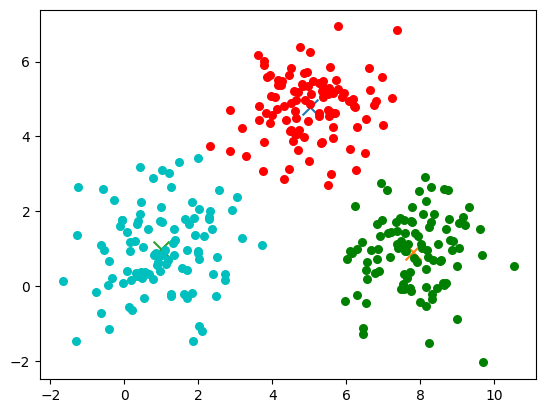

In [3]:
K = 3
center_1 = np.array([1, 1])
center_2 = np.array([5, 5])
center_3 = np.array([8, 1])
# generate random data and center it to the three centers
cluster_1 = np.random.randn(100, 2) + center_1
cluster_2 = np.random.randn(100, 2) + center_2
cluster_3 = np.random.randn(100, 2) + center_3
data = np.concatenate((cluster_1, cluster_2, cluster_3), axis=0)

k_means = K_Means(K)
k_means.fit(data)

# plot our clusters
colors = 10 * ["r", "g", "c", "b", "k"]
for centroid in k_means.centroids:
    plt.scatter(
        k_means.centroids[centroid][0],
        k_means.centroids[centroid][1],
        s=130,
        marker="x",
    )
for cluster_index in k_means.classes:
    color = colors[cluster_index]
    for features in k_means.classes[cluster_index]:
        plt.scatter(features[0], features[1], color=color, s=30)

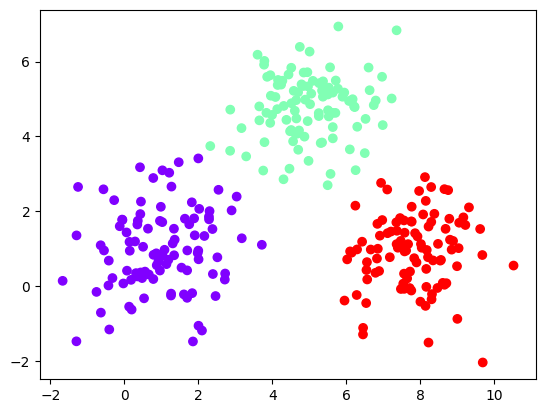

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init = 'auto')
kmeans.fit(data)
plt.scatter(data[:,0],data[:,1], c=kmeans.labels_, cmap='rainbow')